<a href="https://colab.research.google.com/github/rajdas2001/Topmate-ML-Assignment/blob/main/Topmate_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

# Reading the Dataset

In [2]:
df = pd.read_csv("reviews.csv")
df.head()

,user_id,text
0,404,I had my interview scheduled with Amazon for 6...
1,404,The session was really helpful for me to under...
2,404,"Hi Prankur bhaiya,\r\n\r\nFirst of all, thank ..."
3,404,The session provided a lot of clarity for me. ...
4,404,It was a very insightful session. I really lik...


In [3]:
reviews = df.text.tolist()

In [4]:
!pip install happytransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Model for Classification

In [5]:
from happytransformer import HappyTextClassification

l = []
s = []

classifer = HappyTextClassification(model_type="DISTILBERT", model_name="distilbert-base-uncased-finetuned-sst-2-english", num_labels=2)
for elements in reviews:
  result = classifer.classify_text(str(elements))
  l.append(result.label)
  s.append(result.score)

In [6]:
df['Experience'] = l
df['score'] = s

df.head()

,user_id,text,Experience,score
0,404,I had my interview scheduled with Amazon for 6...,POSITIVE,0.787999
1,404,The session was really helpful for me to under...,POSITIVE,0.997007
2,404,"Hi Prankur bhaiya,\r\n\r\nFirst of all, thank ...",POSITIVE,0.999117
3,404,The session provided a lot of clarity for me. ...,POSITIVE,0.999620
4,404,It was a very insightful session. I really lik...,POSITIVE,0.999508


In [7]:
lengths = []
for elements in df.text:
  val = len(str(elements))
  lengths.append(val)

df['Length'] = lengths
df.head()

,user_id,text,Experience,score,Length
0,404,I had my interview scheduled with Amazon for 6...,POSITIVE,0.787999,685
1,404,The session was really helpful for me to under...,POSITIVE,0.997007,1000
2,404,"Hi Prankur bhaiya,\r\n\r\nFirst of all, thank ...",POSITIVE,0.999117,690
3,404,The session provided a lot of clarity for me. ...,POSITIVE,0.999620,294
4,404,It was a very insightful session. I really lik...,POSITIVE,0.999508,522


In [8]:
least_description = df.sort_values(['Length'], ascending=True)
least_description.head()

,user_id,text,Experience,score,Length
1953,24705,.,POSITIVE,0.966878,1
307,1373,.,POSITIVE,0.966878,1
2457,15815,i,POSITIVE,0.979732,1
1258,1630,.,POSITIVE,0.966878,1
3253,9234,.,POSITIVE,0.966878,1


In [9]:
most_description = df.sort_values(['Length'], ascending=False)
most_description.head()

,user_id,text,Experience,score,Length
1,404,The session was really helpful for me to under...,POSITIVE,0.997007,1000
3024,5461,Hii I'm so greatful 💖 first of all this is the...,POSITIVE,0.993826,994
4588,199,Sharing so that this helps others like me :) \...,POSITIVE,0.996592,955
444,1618,Dear Sir\n\nI attended a career counseling ses...,POSITIVE,0.998548,908
6782,26854,I recently had the pleasure of attending a cal...,POSITIVE,0.999844,892


In [10]:
df['rating'] = (df.Length/1000)*5
df.head()

,user_id,text,Experience,score,Length,rating
0,404,I had my interview scheduled with Amazon for 6...,POSITIVE,0.787999,685,3.425
1,404,The session was really helpful for me to under...,POSITIVE,0.997007,1000,5.000
2,404,"Hi Prankur bhaiya,\r\n\r\nFirst of all, thank ...",POSITIVE,0.999117,690,3.450
3,404,The session provided a lot of clarity for me. ...,POSITIVE,0.999620,294,1.470
4,404,It was a very insightful session. I really lik...,POSITIVE,0.999508,522,2.610


In [11]:
df['polarity'] = df['Experience'].map({'POSITIVE': 1, 'NEGATIVE': -1})
df.head()

,user_id,text,Experience,score,Length,rating,polarity
0,404,I had my interview scheduled with Amazon for 6...,POSITIVE,0.787999,685,3.425,1
1,404,The session was really helpful for me to under...,POSITIVE,0.997007,1000,5.000,1
2,404,"Hi Prankur bhaiya,\r\n\r\nFirst of all, thank ...",POSITIVE,0.999117,690,3.450,1
3,404,The session provided a lot of clarity for me. ...,POSITIVE,0.999620,294,1.470,1
4,404,It was a very insightful session. I really lik...,POSITIVE,0.999508,522,2.610,1


# Final Rating

In [12]:
df['Final_Rating'] = df['polarity']*df['rating']
df.head()

,user_id,text,Experience,score,Length,rating,polarity,Final_Rating
0,404,I had my interview scheduled with Amazon for 6...,POSITIVE,0.787999,685,3.425,1,3.425
1,404,The session was really helpful for me to under...,POSITIVE,0.997007,1000,5.000,1,5.000
2,404,"Hi Prankur bhaiya,\r\n\r\nFirst of all, thank ...",POSITIVE,0.999117,690,3.450,1,3.450
3,404,The session provided a lot of clarity for me. ...,POSITIVE,0.999620,294,1.470,1,1.470
4,404,It was a very insightful session. I really lik...,POSITIVE,0.999508,522,2.610,1,2.610


# Sentiment Pie Chart

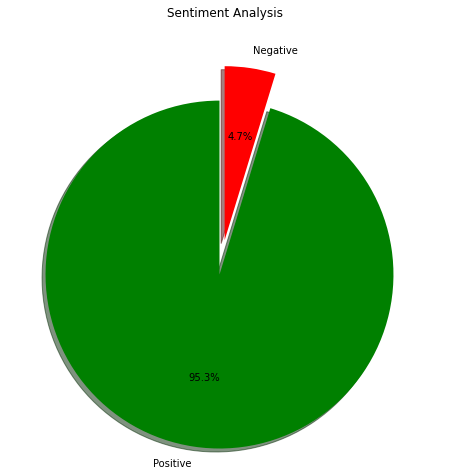

In [13]:
positive = 0
negative = 0

for elements in df.Experience:
  if elements == "POSITIVE":
    positive = positive + 1
  elif elements == "NEGATIVE":
    negative = negative + 1

colors = ['green', 'red']
sizes = [positive, negative]
labels = 'Positive', 'Negative'

plt.figure(figsize=(15,8))
plt.pie(
    x=sizes,
    autopct='%1.1f%%',
    colors=colors,
    labels=labels,
    startangle=90,
    explode = (0.2, 0),
    shadow=True,

)

plt.title("Sentiment Analysis")
plt.show()

# Cosine Similarity for checking Relevance

In [14]:
new_r = [str(x) for x in reviews]

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
vector_matrix = count_vectorizer.fit_transform(new_r)
tokens = count_vectorizer.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
vector_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity_matrix = cosine_similarity(vector_matrix)
cosine_similarity_matrix = np.array(cosine_similarity_matrix)
relevance = pd.DataFrame(cosine_similarity_matrix)
relevance

,0,1,2,3,4,5,6,7,8,9,...,6834,6835,6836,6837,6838,6839,6840,6841,6842,6843
0,1.000000,0.487318,0.506647,0.413718,0.404180,0.311480,0.342987,0.131149,0.487477,0.271750,...,0.343207,0.422374,0.283807,0.232767,0.296426,0.000000,0.086747,0.197350,0.386640,0.043716
1,0.487318,1.000000,0.629656,0.383093,0.558650,0.361532,0.373285,0.086079,0.371145,0.387575,...,0.433925,0.279275,0.276125,0.407400,0.439471,0.068323,0.045549,0.237243,0.284876,0.189374
2,0.506647,0.629656,1.000000,0.549957,0.623664,0.483787,0.417139,0.193515,0.516821,0.419038,...,0.453105,0.384706,0.295599,0.585145,0.411657,0.113776,0.099554,0.183913,0.398735,0.344026
3,0.413718,0.383093,0.549957,1.000000,0.543165,0.401931,0.312738,0.511549,0.380281,0.257829,...,0.498230,0.409688,0.167444,0.216169,0.204037,0.096674,0.169179,0.277810,0.542079,0.182696
4,0.404180,0.558650,0.623664,0.543165,1.000000,0.427312,0.421149,0.258977,0.474886,0.330672,...,0.385231,0.463360,0.276916,0.367711,0.268570,0.171297,0.051389,0.332272,0.465481,0.310772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6839,0.000000,0.068323,0.113776,0.096674,0.171297,0.188982,0.000000,0.000000,0.093659,0.000000,...,0.000000,0.180334,0.000000,0.223607,0.000000,1.000000,0.000000,0.269408,0.053916,0.566947
6840,0.086747,0.045549,0.099554,0.169179,0.051389,0.094491,0.080875,0.188982,0.093659,0.063500,...,0.156174,0.045083,0.144338,0.000000,0.000000,0.000000,1.000000,0.044901,0.161749,0.000000
6841,0.197350,0.237243,0.183913,0.277810,0.332272,0.203653,0.174306,0.203653,0.185037,0.182479,...,0.168298,0.340084,0.207390,0.000000,0.054153,0.269408,0.044901,1.000000,0.367979,0.271538
6842,0.386640,0.284876,0.398735,0.542079,0.465481,0.366813,0.337209,0.326056,0.424178,0.219116,...,0.303132,0.408364,0.186772,0.096449,0.130051,0.053916,0.161749,0.367979,1.000000,0.081514


# Most Frequently Occuring Words

Text(0.5, 1.0, 'Most Frequently Occuring Words')

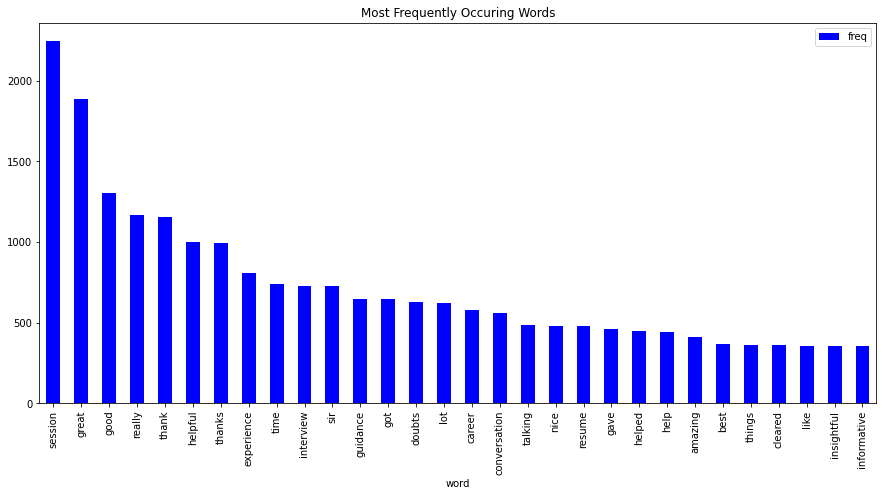

In [18]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(new_r)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words")

# Most Frequently Occuring Words (Bigrams)

Vocabulary size:  45931
Vocabulary:
 ['00 15pm', '00 pm', '00 waited', '000 ft', '01 00', '02 22', '03 00', '04 2022', '04 22', '04 48', '05 pm', '05 raise', '0stars for', '10 04', '10 10', '10 30', '10 55', '10 min', '10 mins', '10 minutes', '10 mnts', '10 more', '10 pm', '10 recommend', '10 to', '10 would', '10 years', '100 amazing', '100 assistance', '100 clarity', '100 days', '100 feedback', '100 few', '100 percent', '100 recommended', '100 satisfied', '100 thank', '100 to', '100 true', '100s of', '101 session', '10am but', '10x have', '10x in', '10x stronger', '11 10', '11 30', '11 years', '12 2021', '12 and', '12 feb', '12 to', '121 with', '12th this', '13 14', '13 mnts', '13th feb', '14 to', '14th march', '15 20', '15 and', '15 but', '15 min', '15 mins', '15 minutes', '15 mnts', '15 pm', '15 years', '15000 people', '15k in', '15pm slot', '16 12', '17pm noone', '199 was', '1hr 599', '1hr and', '1hr but', '1s would', '1st all', '1st at', '1st discussion', '1st session', '1st time'

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Bigrams')

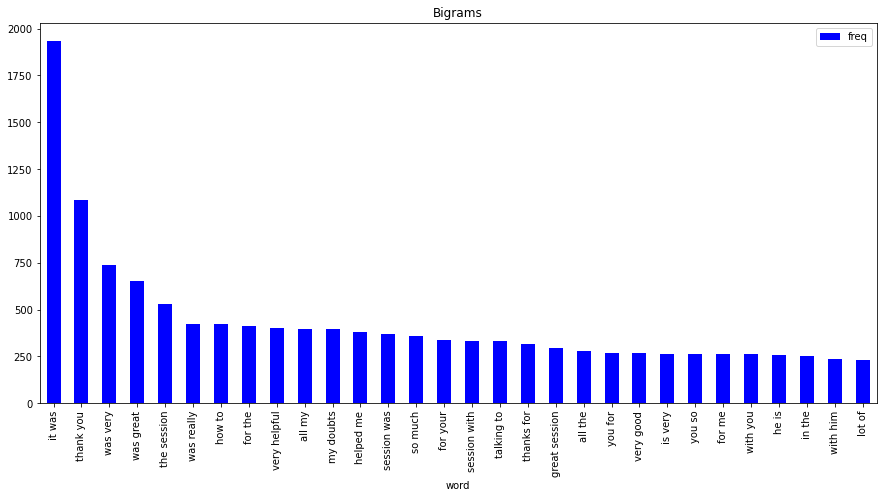

In [19]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(new_r)
print("Vocabulary size: ", len(cv.vocabulary_))
print("Vocabulary:\n", cv.get_feature_names())
words = cv.fit_transform(new_r)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Bigrams")

# WordCloud of total Corpus

Text(0.5, 1.0, 'WordCloud')

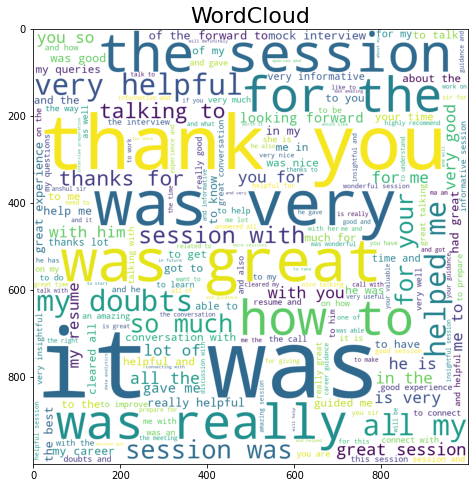

In [20]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud", fontsize = 22)

# WordCloud of Positive Texts

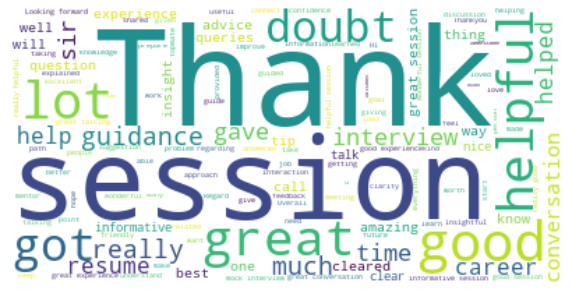

In [21]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

pos_df = df.loc[df['Experience'] == "POSITIVE"]
pos = pos_df.text.tolist()

pos = [str(x) for x in pos]

text = " ".join(i for i in pos)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# WordCloud of Negative Texts

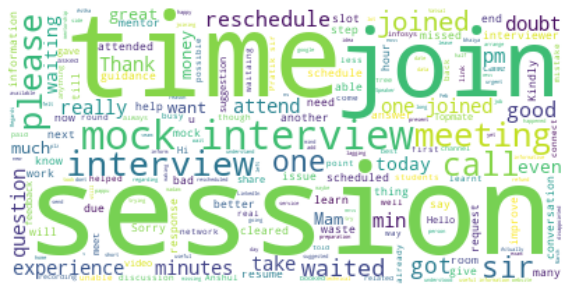

In [22]:
neg_df = df.loc[df['Experience'] == "NEGATIVE"]
neg = neg_df.text.tolist()

neg = [str(x) for x in neg]
text = " ".join(i for i in neg)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()